In [1]:
def ew2py(fileName):
    """
        Reads EasyWave binary output into numpy arrays. 
        Works for .ssh and .sshmax files (at least).
        
        Example usage:

        lon, lat, h = ew2py(fileName)    
        plt.pcolormesh(lon,lat,h)
    """
    import struct
    from numpy import zeros, linspace

    f = open(fileName, 'rb')
    dsbb = f.read(4)

    nOutI = struct.unpack('h',f.read(2))[0]
    nOutJ = struct.unpack('h',f.read(2))[0]
    
    lonOutMin = struct.unpack('d',f.read(8))[0]
    lonOutMax = struct.unpack('d',f.read(8))[0]
    latOutMin = struct.unpack('d',f.read(8))[0]
    latOutMax = struct.unpack('d',f.read(8))[0]
    
    tmp = f.read(8)
    tmp = f.read(8)

    lon = linspace(lonOutMin,lonOutMax,nOutI)
    lat = linspace(latOutMin,latOutMax,nOutJ)
    values = zeros((nOutJ,nOutI))

    for j in range(nOutJ):
        for i in range(nOutI):
            value = f.read(4)
            value = struct.unpack('f',value)[0]
            values[j,i] = value
    return lon, lat, values

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Get time series for comparison

In [3]:
tlab = np.loadtxt('../tsunamilab/tseries',delimiter=',',skiprows=1)
tlab_dl = np.loadtxt('../tsunamilab/tseries_DeLouis',delimiter=',',skiprows=1)

ewave = np.loadtxt('../easyWave_midtop/eWave.poi.ssh',skiprows=1)
ewave_dl = np.loadtxt('../easyWave/eWave.poi.ssh',skiprows=1)


dart = np.loadtxt('32412_notide_2010.txt')

In [4]:
from clawpack.visclaw.data import ClawPlotData

plotdata = ClawPlotData()
plotdata.outdir = "../geoclaw/_output"
gaugedata = plotdata.getgauge(32412)

Read in gauge 32412.


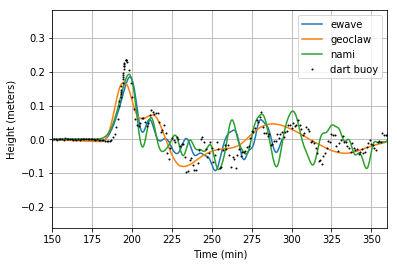

In [13]:

plt.plot(ewave_dl[:,0],ewave_dl[:,1],label='ewave')

# plt.plot(ewave[:,0],ewave[:,1],label='ewave')
# plt.plot(tlab[:,0]/60, tlab[:,1], '-',label='tlab')

plt.plot(gaugedata.t/60.0, gaugedata.q[3,:], label='geoclaw')
plt.plot(tlab[:,0]/60, tlab_dl[:,1], '-',label='nami')
plt.plot(dart[:,0]/60, dart[:,1],'.', label='dart buoy', ms=2, c='k')

plt.legend(loc=0)
plt.xlim(2.5*60,6*60)
# plt.xlim(175,200)
plt.xlabel('Time (min)')
plt.ylabel('Height (meters)')
plt.grid('on')
